<a href="https://colab.research.google.com/github/spurthip28-bit/Supervised-Learning/blob/Jupyter/Bank_Personal_Loan_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK PERSONAL LOAN MODELING**

## ***Objective***

 Classify customers if they will accept a personal loan offer based on their dempgraphics and financial health

## ***Data Preprocessing***

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import dataset
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv",on_bad_lines="skip")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
#Format column names to lower case
df.columns = [x.lower() for x in df.columns]
df.columns


Index(['id', 'age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [6]:
#Rename column name
df.rename(columns={"zip code":"zip_code","securities account":"securities_account","cd account":"cd_account","personal loan":"personal_loan"},inplace=True)

In [7]:
#total number of unique zip codes
df['zip_code'].nunique()

467

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We observe that most of the columns are integers. To avoid confusion

*   Convert id,zip_Code,education to object datatype
*   Convert cd_account ,personal_loan,securities_account,online,creditCard to boolean datatype



In [9]:
#Change data types
df['id']=df['id'].astype(str)
df['zip_code']=df['zip_code'].astype(str)
df['education']=df['education'].astype(str)
df['cd_account']=df['cd_account'].astype(str)
df['personal_loan']=df['personal_loan'].astype(str)
df['creditcard']=df['creditcard'].astype(str)
df['online']=df['online'].astype(str)
df['securities_account']=df['securities_account'].astype(str)

In [10]:
df.describe()

,age,experience,income,family,ccavg,mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


In [11]:
# Create income bins
income_bins = [0, 50, 100, 150, 200, df['income'].max()]
income_labels = ['0-50', '50-100', '100-150', '150-200', '200+']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, df['age'].max()]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59','60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [12]:
df.dtypes

,0
id,object
age,int64
experience,int64
income,int64
zip_code,object
family,int64
ccavg,float64
education,object
mortgage,int64
personal_loan,object


## ***EDA (Exploratory Data Analysis)***

**What are we trying to answer?**

*Uni- variate Analysis*

*   Age distribution
*   Annual Income distribution
*   Education Level

*Bi- variate Analysis*

*   Mortgage Vs Personal Loan
*   ccavg Vs Personal Loan
*   Securities account,cd account,personal loan
*   zip code vs personal loan








#### ***Uni-variate Analysis***

<Axes: xlabel='age_group'>

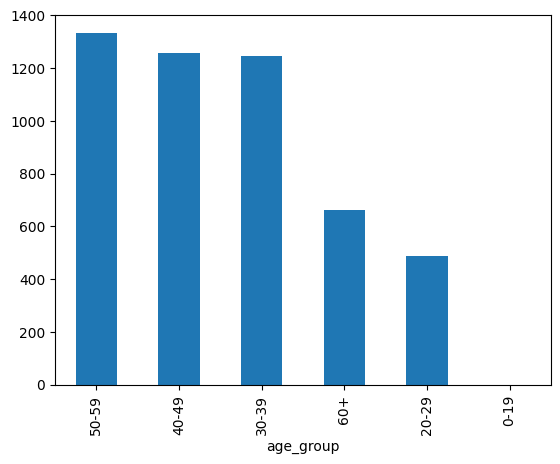

In [13]:
#Age distribution
df['age_group'].value_counts().plot(kind='bar')

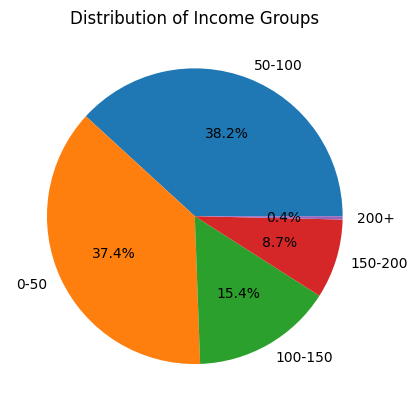

In [14]:
#Income distribution pie chart with percentages
df['income_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Income Groups')
plt.ylabel('') # Remove default ylabel
plt.show()

<Axes: xlabel='income'>

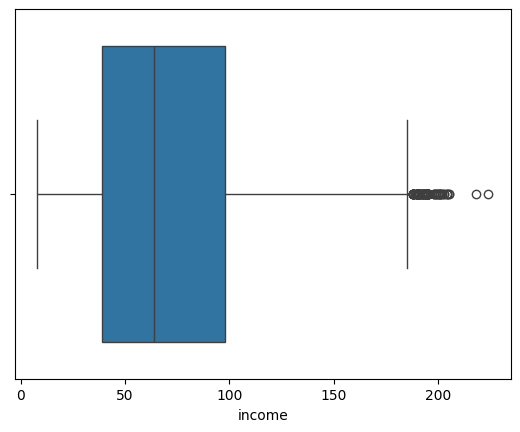

In [15]:
sns.boxplot(data=df,x="income")

<Axes: xlabel='income', ylabel='Percent'>

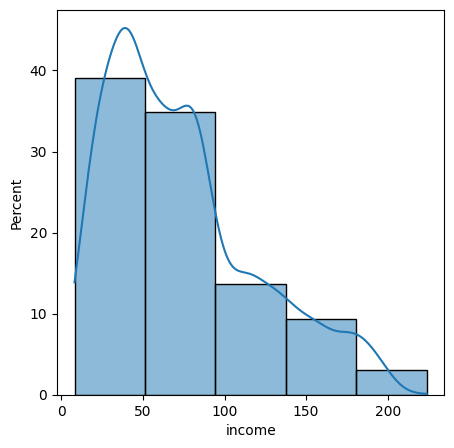

In [16]:
#Income Distribution
plt.figure(figsize=(5,5))
sns.histplot(data=df,x="income",bins=5,stat="percent",kde=True)


<Axes: xlabel='education', ylabel='count'>

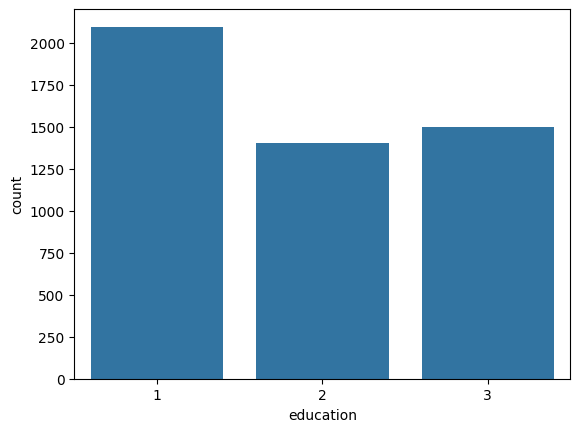

In [17]:
sns.countplot(data=df,x="education")

<Axes: xlabel='percent', ylabel='personal_loan'>

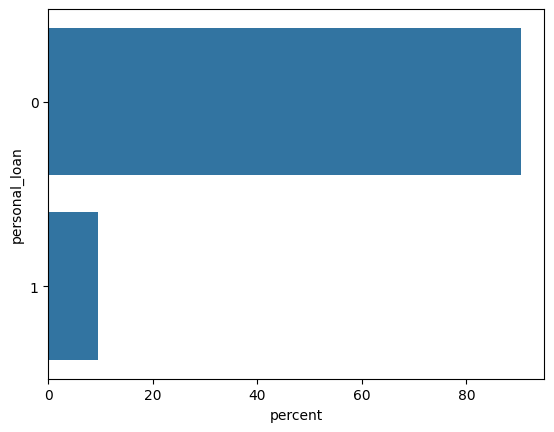

In [18]:
#Target variable distribution plot
sns.countplot(df['personal_loan'],stat="percent")

*   Majority of the customers in the datset are between the age group 30-60
*  Around 75% of the population earn less than 100K per year
*   The education level is not varied based on the data
*  The target variable personal_loan is highly imbalanced



#### ***Bi- Variate Analysis***

In [19]:
#Average Mortgage value of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["mortgage"].mean()

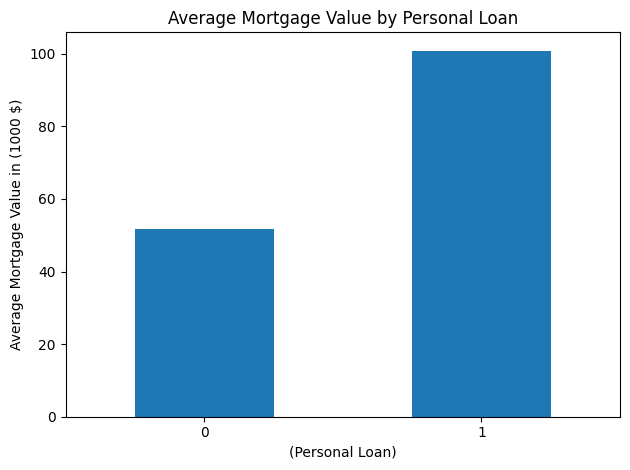

In [20]:
# Plot the average mortgage value by personal loan and creditcard
x.plot(kind='bar')
plt.title('Average Mortgage Value by Personal Loan')
plt.xlabel('(Personal Loan)')
plt.ylabel('Average Mortgage Value in (1000 $)')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [21]:
#Average Income of customers who accepted personal loan in last campaign
x=df.groupby(["personal_loan"])["income"].mean()

Text(0, 0.5, 'Average Income')

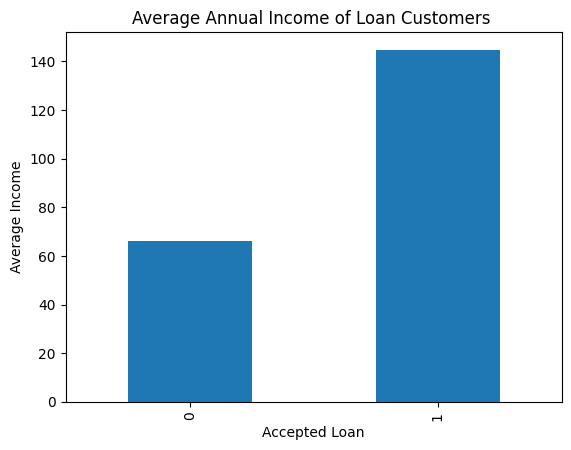

In [22]:
x.plot(kind="bar")
plt.title("Average Annual Income of Loan Customers ")
plt.xlabel("Accepted Loan")
plt.ylabel("Average Income")

<Axes: xlabel='age_group', ylabel='count'>

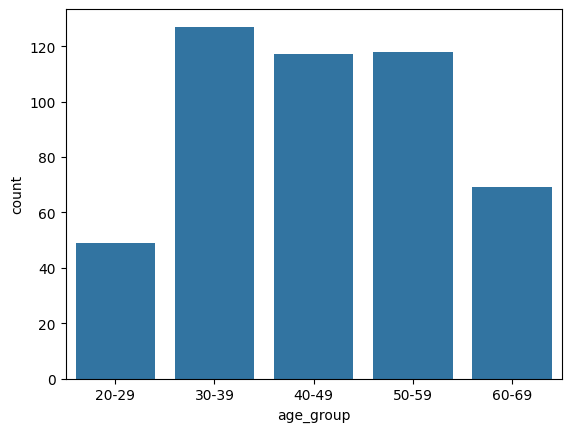

In [23]:
#Loan acceptors by age group
age_bins = range(20, 71, 10)
age_labels=[f'{i}-{i+9}' for i in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
loan_accepters=df[df["personal_loan"]=='1']
loan_accepters['age_group'].value_counts().sort_values(ascending=False)
sns.countplot(data=loan_accepters,x="age_group")

/tmp/ipython-input-3918027835.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()


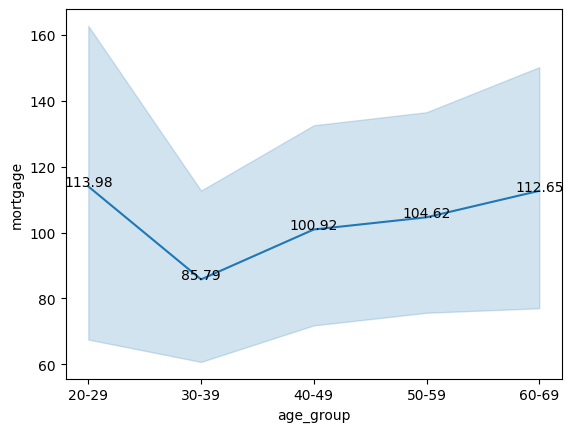

In [24]:
ax = sns.lineplot(data=loan_accepters,x="age_group",y="mortgage")

# Get the data for the plot
plot_data = loan_accepters.groupby('age_group')['mortgage'].mean().reset_index()

# Add labels to the points
for i, row in plot_data.iterrows():
    ax.text(row['age_group'], row['mortgage'], round(row['mortgage'], 2), color='black', ha="center")

plt.show()

In [25]:
#Family count vs loan acceptance
family_loan_counts = df.groupby(['personal_loan', 'family']).size().unstack(fill_value=0)

print("Counts of family sizes for Personal Loan = 0 (No Loan)")
print(family_loan_counts.loc['0'])

print("\nCounts of family sizes for Personal Loan = 1 (Loan Accepted)")
print(family_loan_counts.loc['1'])

Counts of family sizes for Personal Loan = 0 (No Loan)
family
1    1365
2    1190
3     877
4    1088
Name: 0, dtype: int64

Counts of family sizes for Personal Loan = 1 (Loan Accepted)
family
1    107
2    106
3    133
4    134
Name: 1, dtype: int64


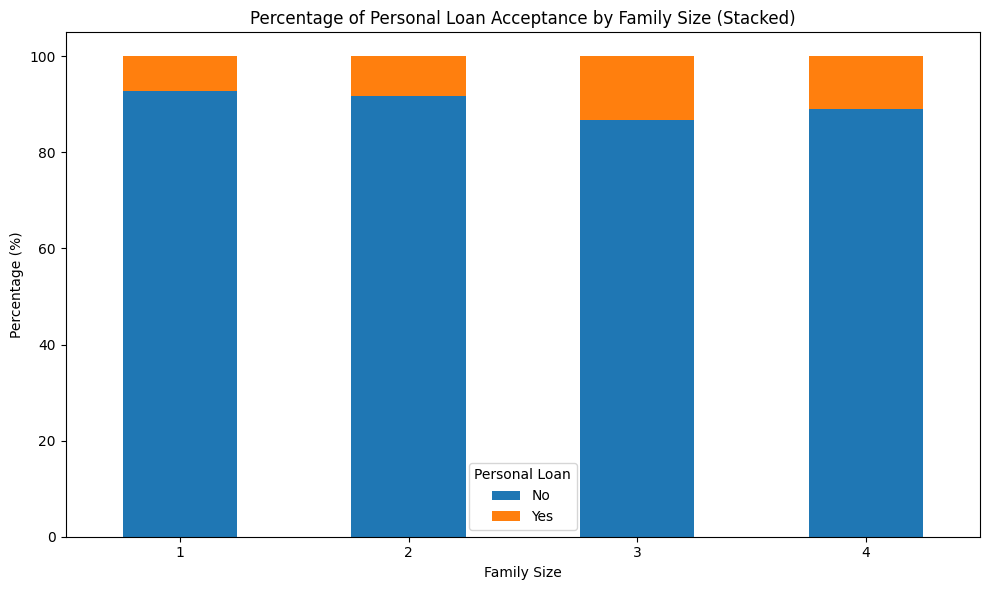

In [26]:
family_loan_percentages_by_family = family_loan_counts.apply(lambda x: x / x.sum(), axis=0) * 100

family_loan_percentages_by_family.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Personal Loan Acceptance by Family Size (Stacked)')
plt.xlabel('Family Size')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='creditcard'>

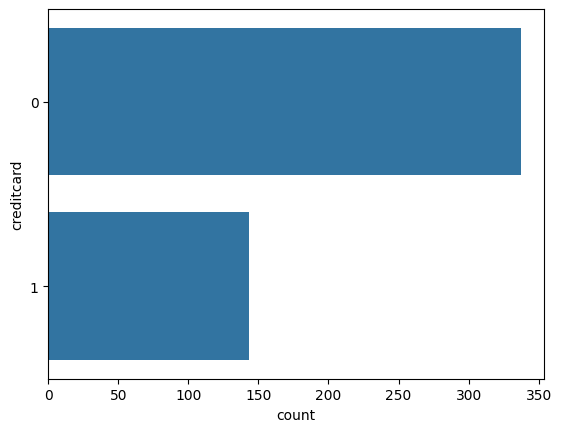

In [27]:
#
sns.countplot(data=loan_accepters,y='creditcard')

<Axes: xlabel='percent', ylabel='education'>

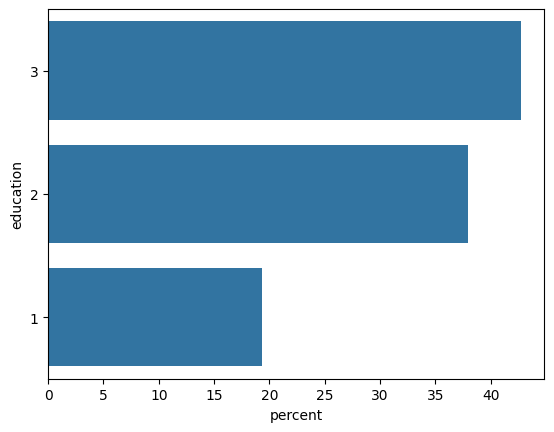

In [28]:
sns.countplot(data=loan_accepters,y="education",stat="percent")

<Axes: xlabel='income', ylabel='Percent'>

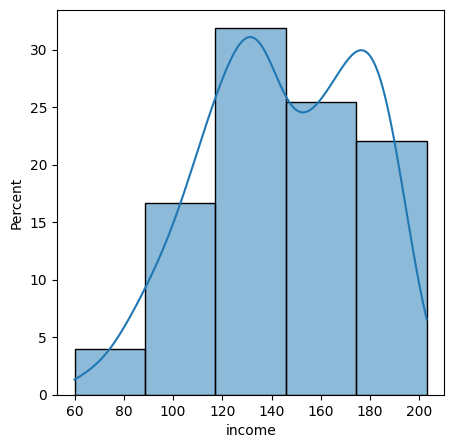

In [29]:


plt.figure(figsize=(5,5))
sns.histplot(data=loan_accepters,x="income",bins=5,stat="percent",kde=True)

#### ***EDA Insights***


*  The average mortgage loan is almost double for the people who accepted the personal loan offer
*   The average income of loan acceptors is more than double the average income of non-loan acceptors
*   Majority of customers who accepted the loan offer are between the age group 30-60
*   Customers of age group 30-39 might be the potential loan acceptors as they have love average mortgage
*   The acceptance rate of personal loan offer is higher in familys with 3 and 4 members
*  The acceptance rate of personal loan is double for people without credit cards








## ***Feature Engineering/Feature Selection***

In [30]:
df.drop(columns=['zip_code','id','age','income'],inplace=True)

In [31]:
num_cols= df.select_dtypes(include=np.number)
cat_cols= df.select_dtypes(exclude=np.number)

In [32]:
df['age_group'].dtype

CategoricalDtype(categories=['20-29', '30-39', '40-49', '50-59', '60-69'], ordered=True, categories_dtype=object)

In [33]:
cat_cols

,education,personal_loan,securities_account,cd_account,online,creditcard,income_group,age_group
0,1,0,1,0,0,0,0-50,20-29
1,1,0,1,0,0,0,0-50,40-49
2,1,0,0,0,0,0,0-50,30-39
3,2,0,0,0,0,0,100-150,30-39
4,2,0,0,0,0,1,0-50,30-39
...,...,...,...,...,...,...,...,...
4995,3,0,0,0,1,0,0-50,20-29
4996,1,0,0,0,1,0,0-50,30-39
4997,3,0,0,0,0,0,0-50,60-69
4998,2,0,0,0,1,0,0-50,60-69


#### ***Chi-Squared test for categorical variable selection***

In [34]:
from scipy.stats import chi2_contingency

In [35]:
#Personal loan vs age group

contingency_table = pd.crosstab(df['personal_loan'], df['age_group'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

age_group      20-29  30-39  40-49  50-59  60-69
personal_loan                                   
0                439   1120   1140   1216    605
1                 49    127    117    118     69
Chi-square statistic: 1.9141578472294905
P-value: 0.7515437105051543
Degrees of freedom: 4
Expected frequencies:
[[ 441.152 1127.288 1136.328 1205.936  609.296]
 [  46.848  119.712  120.672  128.064   64.704]]


In [36]:
#Personal loan vs income group

contingency_table = pd.crosstab(df['personal_loan'], df['income_group'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")


income_group   0-50  50-100  100-150  150-200  200+
personal_loan                                      
0              1869    1868      550      217    15
1                 0      41      219      217     3
Chi-square statistic: 1453.4569272773292
P-value: 0.0
Degrees of freedom: 4
Expected frequencies:
[[1689.54010802 1725.69933987  695.16123225  392.32766553   16.27165433]
 [ 179.45989198  183.30066013   73.83876775   41.67233447    1.72834567]]


In [37]:
#Personal loan vs education

contingency_table = pd.crosstab(df['personal_loan'], df['education'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

education         1     2     3
personal_loan                  
0              2003  1221  1296
1                93   182   205
Chi-square statistic: 111.2398718738913
P-value: 6.991473868665428e-25
Degrees of freedom: 2
Expected frequencies:
[[1894.784 1268.312 1356.904]
 [ 201.216  134.688  144.096]]


In [38]:
#Personal loan vs securities_account

contingency_table = pd.crosstab(df['personal_loan'], df['securities_account'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

securities_account     0    1
personal_loan                
0                   4058  462
1                    420   60
Chi-square statistic: 2.172310545186504
P-value: 0.14051497326319357
Degrees of freedom: 1
Expected frequencies:
[[4048.112  471.888]
 [ 429.888   50.112]]


In [39]:
#Personal loan vs cd_account

contingency_table = pd.crosstab(df['personal_loan'], df['cd_account'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

cd_account        0    1
personal_loan           
0              4358  162
1               340  140
Chi-square statistic: 495.90424218782334
P-value: 7.398297503329848e-110
Degrees of freedom: 1
Expected frequencies:
[[4246.992  273.008]
 [ 451.008   28.992]]


In [40]:
#Personal loan vs online

contingency_table = pd.crosstab(df['personal_loan'], df['online'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

online            0     1
personal_loan            
0              1827  2693
1               189   291
Chi-square statistic: 0.1560067212052492
P-value: 0.6928599643141485
Degrees of freedom: 1
Expected frequencies:
[[1822.464 2697.536]
 [ 193.536  286.464]]


In [41]:
#Personal loan vs creditcard

contingency_table = pd.crosstab(df['personal_loan'], df['creditcard'])
print(contingency_table)

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

creditcard        0     1
personal_loan            
0              3193  1327
1               337   143
Chi-square statistic: 0.021144453920855056
P-value: 0.8843861223314504
Degrees of freedom: 1
Expected frequencies:
[[3191.12 1328.88]
 [ 338.88  141.12]]


#### ***Chi-squared Test Insights***


*  Key predictors: Income, Education, and CD account
*  Not predictive: Age group,Securities account,Online account,Credit card do not statistacally influence loan uptake.



In [42]:
#Drop columns that are not relevant for classification
df.drop(columns=['creditcard','online','age_group','securities_account'],inplace=True)


#### ***One hot encoding***

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Select only the categorical columns you want to encode
cat_cols = ['education', 'personal_loan', 'cd_account', 'income_group']

# Use pd.get_dummies on the relevant categorical columns
df_encoded = pd.get_dummies(df[cat_cols], columns=cat_cols, drop_first=True)

# Concatenate the numerical columns and the one-hot encoded categorical columns
df_sklearn_encoded = pd.concat([df.drop(columns=cat_cols), df_encoded], axis=1)

In [44]:
print("Columns in df after dropping categorical columns:")
print(df.drop(columns=cat_cols).columns)

print("\nColumns in df_encoded:")
print(df_encoded.columns)

print("\nColumns in df_sklearn_encoded:")
print(df_sklearn_encoded.columns)

Columns in df after dropping categorical columns:
Index(['experience', 'family', 'ccavg', 'mortgage'], dtype='object')

Columns in df_encoded:
Index(['education_2', 'education_3', 'personal_loan_1', 'cd_account_1',
       'income_group_50-100', 'income_group_100-150', 'income_group_150-200',
       'income_group_200+'],
      dtype='object')

Columns in df_sklearn_encoded:
Index(['experience', 'family', 'ccavg', 'mortgage', 'education_2',
       'education_3', 'personal_loan_1', 'cd_account_1', 'income_group_50-100',
       'income_group_100-150', 'income_group_150-200', 'income_group_200+'],
      dtype='object')


In [45]:
df_sklearn_encoded

,experience,family,ccavg,mortgage,education_2,education_3,personal_loan_1,cd_account_1,income_group_50-100,income_group_100-150,income_group_150-200,income_group_200+
0,1,4,1.6,0,False,False,False,False,False,False,False,False
1,19,3,1.5,0,False,False,False,False,False,False,False,False
2,15,1,1.0,0,False,False,False,False,False,False,False,False
3,9,1,2.7,0,True,False,False,False,False,True,False,False
4,8,4,1.0,0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,1,1.9,0,False,True,False,False,False,False,False,False
4996,4,4,0.4,85,False,False,False,False,False,False,False,False
4997,39,2,0.3,0,False,True,False,False,False,False,False,False
4998,40,3,0.5,0,True,False,False,False,False,False,False,False


#### ***ANOVA Test***

In [46]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns from the encoded DataFrame
numerical_cols_encoded = df_sklearn_encoded.select_dtypes(include=np.number).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_sklearn_encoded[numerical_cols_encoded] = scaler.fit_transform(df_sklearn_encoded[numerical_cols_encoded])

# Display the first few rows of the scaled DataFrame
display(df_sklearn_encoded.head())

,experience,family,ccavg,mortgage,education_2,education_3,personal_loan_1,cd_account_1,income_group_50-100,income_group_100-150,income_group_150-200,income_group_200+
0,-1.666078,1.397414,-0.193385,-0.555524,False,False,False,False,False,False,False,False
1,-0.096330,0.525991,-0.250611,-0.555524,False,False,False,False,False,False,False,False
2,-0.445163,-1.216855,-0.536736,-0.555524,False,False,False,False,False,False,False,False
3,-0.968413,-1.216855,0.436091,-0.555524,True,False,False,False,False,True,False,False
4,-1.055621,1.397414,-0.536736,-0.555524,True,False,False,False,False,False,False,False


In [47]:
num_cols = df_sklearn_encoded.select_dtypes(include=np.number).columns
target = 'personal_loan'


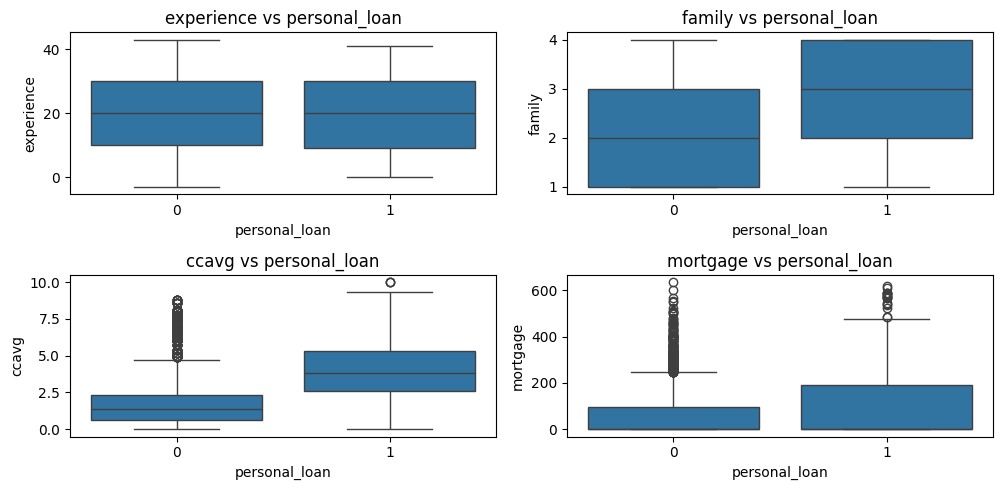

In [48]:
#Box plots to observe the distribution
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


#ANOVA for F statistic and p-value
for col in num_cols:
    # Create a formula for the ANOVA test
    formula = f'{col} ~ C({target})'

    # Perform the ANOVA test
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the results
    print(f"ANOVA for {col} vs {target}")
    print(anova_table)
    print("-" * 30)

ANOVA for experience vs personal_loan
                         sum_sq      df         F    PR(>F)
C(personal_loan)      36.128879     1.0  0.274675  0.600236
Residual          657402.165321  4998.0       NaN       NaN
------------------------------
ANOVA for family vs personal_loan
                       sum_sq      df          F    PR(>F)
C(personal_loan)    24.796041     1.0  18.893189  0.000014
Residual          6559.539159  4998.0        NaN       NaN
------------------------------
ANOVA for ccavg vs personal_loan
                        sum_sq      df           F         PR(>F)
C(personal_loan)   2055.252941     1.0  777.413007  3.830266e-159
Residual          13213.252299  4998.0         NaN            NaN
------------------------------
ANOVA for mortgage vs personal_loan
                        sum_sq      df           F        PR(>F)
C(personal_loan)  1.044244e+06     1.0  102.994466  5.730342e-24
Residual          5.067390e+07  4998.0         NaN           NaN
----------------


*   Mortgage and ccavg are statistically relevant for the classification.
*   Other columns should be dropped




In [50]:
#Drop irrelevant column for analysis
df_sklearn_encoded.drop(columns=['experience','family'],inplace=True)

In [51]:
df_sklearn_encoded.columns

Index(['ccavg', 'mortgage', 'education_2', 'education_3', 'personal_loan_1',
       'cd_account_1', 'income_group_50-100', 'income_group_100-150',
       'income_group_150-200', 'income_group_200+'],
      dtype='object')

#### ***SMOTE Analysis***

In [52]:
X=df_sklearn_encoded.drop(columns='personal_loan_1')
y=df_sklearn_encoded['personal_loan_1']

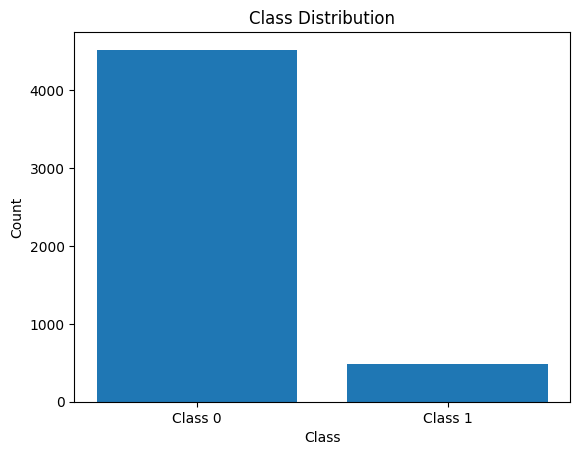

In [53]:
count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

In [55]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

,count
personal_loan_1,
False,4520
True,4520


In [ ]:
y_resampled.value_counts()

#### ***Model Selection and Training***

##### ***Split Data***

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##### ***Train Model***

##### ***Logistic Regression***

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9131637168141593
Precision: 0.9164733178654292
Recall: 0.9028571428571428
F1-score: 0.9096142774899252
Confusion Matrix:
[[861  72]
 [ 85 790]]


##### ***Other Models***

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

##### *Random Forest*

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("RandomForestClassifier Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

RandomForestClassifier Performance:
Accuracy: 0.9679203539823009
Precision: 0.9733487833140209
Recall: 0.96
F1-score: 0.9666283084004603
Confusion Matrix:
[[910  23]
 [ 35 840]]


##### *Support Vector Machine*

In [61]:
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSupport Vector Machine Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)


Support Vector Machine Performance:
Accuracy: 0.9220132743362832
Precision: 0.9327830188679245
Recall: 0.904
F1-score: 0.918165989553105
Confusion Matrix:
[[876  57]
 [ 84 791]]


##### *KNN Model*

In [62]:
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)


K-Nearest Neighbors Performance:
Accuracy: 0.9424778761061947
Precision: 0.945664739884393
Recall: 0.9348571428571428
F1-score: 0.9402298850574713
Confusion Matrix:
[[886  47]
 [ 57 818]]


#### **Model Evaluation**

##### ***Compare Model Performance***

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.913164,0.916473,0.902857,0.909614
1,RandomForestClassifier,0.967920,0.973349,0.960000,0.966628
2,Support Vector Machine,0.922013,0.932783,0.904000,0.918166
3,K-Nearest Neighbors,0.942478,0.945665,0.934857,0.940230


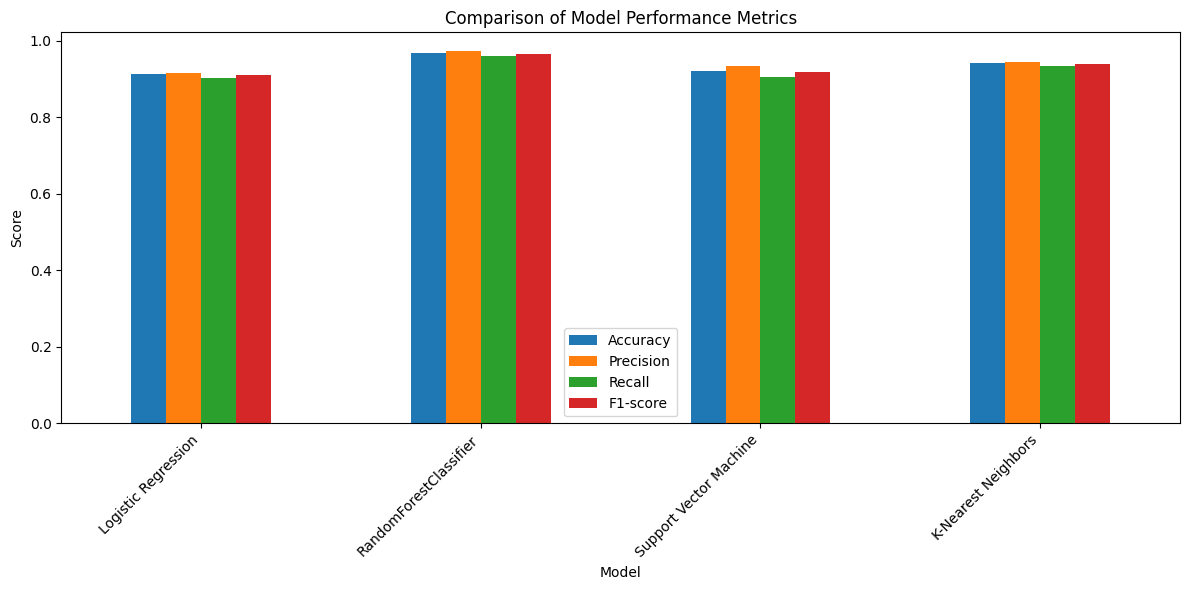

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to store the performance metrics
performance_metrics = {
    'Model': ['Logistic Regression', 'RandomForestClassifier', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_svm, accuracy_knn],
    'Precision': [precision, precision_rf, precision_svm, precision_knn],
    'Recall': [recall, recall_rf, recall_svm, recall_knn],
    'F1-score': [f1, f1_rf, f1_svm, f1_knn]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_metrics)

# Display the comparison table
display(performance_df)

# Create a bar chart to visualize the performance metrics
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
print("Model Performance Analysis:")
print("-" * 30)

# Analyze performance_df to identify the best performing model
best_accuracy_model = performance_df.loc[performance_df['Accuracy'].idxmax()]
best_precision_model = performance_df.loc[performance_df['Precision'].idxmax()]
best_recall_model = performance_df.loc[performance_df['Recall'].idxmax()]
best_f1_model = performance_df.loc[performance_df['F1-score'].idxmax()]

print(f"Model with highest Accuracy:\n{best_accuracy_model}\n")
print(f"Model with highest Precision:\n{best_precision_model}\n")
print(f"Model with highest Recall:\n{best_recall_model}\n")
print(f"Model with highest F1-score:\n{best_f1_model}\n")

print("Overall Best Performing Model:")
# Based on the metrics, RandomForestClassifier appears to be the best performing model.
print("Based on the comparison table and visualization, the RandomForestClassifier model consistently performs best across all evaluated metrics (Accuracy, Precision, Recall, and F1-score).")
print("It exhibits the highest values for Accuracy (0.968), Precision (0.973), Recall (0.960), and F1-score (0.967).")
print("While other models like K-Nearest Neighbors also show good performance, RandomForestClassifier's superior scores across the board make it the most suitable model for this personal loan classification task.")


Model Performance Analysis:
------------------------------
Model with highest Accuracy:
Model        RandomForestClassifier
Accuracy                    0.96792
Precision                  0.973349
Recall                         0.96
F1-score                   0.966628
Name: 1, dtype: object

Model with highest Precision:
Model        RandomForestClassifier
Accuracy                    0.96792
Precision                  0.973349
Recall                         0.96
F1-score                   0.966628
Name: 1, dtype: object

Model with highest Recall:
Model        RandomForestClassifier
Accuracy                    0.96792
Precision                  0.973349
Recall                         0.96
F1-score                   0.966628
Name: 1, dtype: object

Model with highest F1-score:
Model        RandomForestClassifier
Accuracy                    0.96792
Precision                  0.973349
Recall                         0.96
F1-score                   0.966628
Name: 1, dtype: object

Overall Be

#### ***Data Analysis Key Findings***

*  RandomForestClassifier achieved the highest accuracy (0.968), precision (0.973), recall (0.960), and F1-score (0.967) among the evaluated models.
*  Support Vector Machine (SVM) showed good performance but was slightly lower than RandomForestClassifier across all metrics (Accuracy: 0.922, Precision: 0.933, Recall: 0.904, F1-score: 0.918)
* K-Nearest Neighbors (KNN) performed better than SVM but slightly worse than RandomForestClassifier (Accuracy: 0.942, Precision: 0.946, Recall: 0.935, F1-score: 0.940)
* The comparison table and bar chart clearly illustrated the superior performance of the RandomForestClassifier.


